In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = 'caffe/'
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

import os
import h5py
import shutil
import tempfile

In [3]:
import numpy as np

X = []
with open('Data/Train/data.bin', 'r') as f:
    while True:
        try:
            X.append(np.load(f))
        except Exception, e:
            break
            

In [39]:
h = 30
w = 30
Xt_resized = []
Xt = []
with open('Data/Test/data.bin', 'r') as f:
    while True:
        try:
            Xt.append(np.load(f))
            Xt_resized.append(scipy.misc.imresize(Xt[-1], (h, w)))
        except Exception, e:
            break

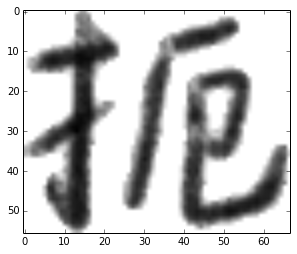

In [14]:
plt.imshow(X[0], cmap=plt.cm.gray)

In [31]:
import scipy
import scipy.misc
h = 30
w = 30
X_resized = []
for (index, image) in enumerate(X):
    if index % 10000 == 0:
        print index
    X_resized.append(scipy.misc.imresize(X[index], (h, w)))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


In [33]:
h = 30
w = 30
Xt_resized = []
for (index, image) in enumerate(Xt):
    if index % 10000 == 0:
        print index
    Xt_resized.append(scipy.misc.imresize(Xt[index], (h, w)))

NameError: name 'Xt' is not defined

In [14]:
import pandas as pd

y = pd.read_csv('Data/Train/train.csv')
y = y['Prediction'].values

In [32]:
X_resized = np.array(X_resized)

In [24]:
X_blind = np.array(Xt_resized)

In [35]:
n_samples = len(X)
n_train_samples = int(0.9 * n_samples)

indices = np.arange(n_samples)
np.random.shuffle(indices)

train_indices = indices[: n_train_samples]
test_indices = indices[n_train_samples:]
X_train = X_resized[train_indices, :]
y_train = y[train_indices]
X_test = X_resized[test_indices, :]
y_test = y[test_indices]

In [70]:
X_train.shape

(180000, 30, 30)

In [36]:
# Write out the data to HDF5 files in a temp directory.
# This file is assumed to be caffe_root/examples/hdf5_classification.ipynb
dirname = os.path.abspath('./rdlclass/data')
if not os.path.exists(dirname):
    os.makedirs(dirname)

train_filename = os.path.join(dirname, 'train.h5')
test_filename = os.path.join(dirname, 'test.h5')
blind_filename = os.path.join(dirname, 'blind.h5')

# HDF5DataLayer source should be a file containing a list of HDF5 filenames.
# To show this off, we'll list the same data file twice.
with h5py.File(train_filename, 'w') as f:
    f['data'] = X_train.astype(np.float32)
    f['label'] = y_train.astype(np.float32)
with open(os.path.join(dirname, 'train.txt'), 'w') as f:
    f.write(train_filename + '\n')
    
# HDF5 is pretty efficient, but can be further compressed.
comp_kwargs = {'compression': 'gzip', 'compression_opts': 1}
with h5py.File(test_filename, 'w') as f:
    f.create_dataset('data', data=X_test.astype(np.float32), **comp_kwargs)
    f.create_dataset('label', data=y_test.astype(np.float32), **comp_kwargs)
with open(os.path.join(dirname, 'test.txt'), 'w') as f:
    f.write(test_filename + '\n')
    
# HDF5 is pretty efficient, but can be further compressed.
#comp_kwargs = {'compression': 'gzip', 'compression_opts': 1}
#with h5py.File(blind_filename, 'w') as f:
#    f.create_dataset('data', data=X_blind.astype(np.float32), **comp_kwargs)
#with open(os.path.join(dirname, 'blind.txt'), 'w') as f:
#    f.write(blind_filename + '\n')

In [38]:
!caffe/build/tools/caffe train -solver rdlclass/solver.prototxt

libdc1394 error: Failed to initialize libdc1394
I0411 16:22:46.620281 16153 caffe.cpp:117] Use CPU.
I0411 16:22:46.620590 16153 caffe.cpp:121] Starting Optimization
I0411 16:22:46.620708 16153 solver.cpp:32] Initializing solver from parameters: 
test_iter: 250
test_interval: 1000
base_lr: 0.01
display: 100
max_iter: 10000
lr_policy: "step"
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005
stepsize: 5000
snapshot: 10000
snapshot_prefix: "rdlclass/data/train"
solver_mode: CPU
net: "rdlclass/train_val.prototxt"
I0411 16:22:46.620779 16153 solver.cpp:70] Creating training net from net file: rdlclass/train_val.prototxt
I0411 16:22:46.621148 16153 net.cpp:257] The NetState phase (0) differed from the phase (1) specified by a rule in layer data
I0411 16:22:46.621183 16153 net.cpp:257] The NetState phase (0) differed from the phase (1) specified by a rule in layer accuracy
I0411 16:22:46.621266 16153 net.cpp:42] Initializing net from parameters: 
name: "LogisticRegressionNet"
state {
  phase: TRAI

In [71]:
for (index, image) in enumerate(Xt_resized):
    Xt_resized[index] = image.reshape(30, 30, 1)

In [72]:
print Xt_resized[0].shape

(30, 30, 1)


In [82]:
for image in X_test[:10]:
    new_image = image[:, :, np.newaxis]
    print new_image.shape

(30, 30, 1)
(30, 30, 1)
(30, 30, 1)
(30, 30, 1)
(30, 30, 1)
(30, 30, 1)
(30, 30, 1)
(30, 30, 1)
(30, 30, 1)
(30, 30, 1)


0
1
2
3
4
5
6
7
8
9
prediction shape: (2000,)
predicted class: 895


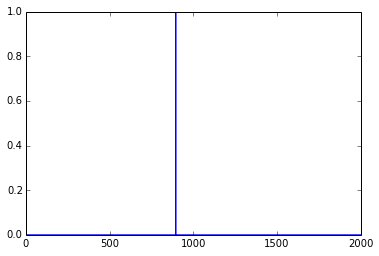

In [132]:
# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = 'rdlclass/deploy.prototxt'
PRETRAINED = 'rdlclass/data/train_iter_10000.caffemodel'

caffe.set_mode_cpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED)

batch_size = 20000
predictions = []
for i in range(len(Xt_resized) / batch_size):
    print(i)
    prediction = net.predict([image.reshape(1, 1, 900) for image in Xt_resized[i * (batch_size): (i + 1) * batch_size]]) # predict takes any number of images, and formats them for the Caffe net automatically
    predictions.append(prediction)

print 'prediction shape:', prediction[0].shape
plt.plot(prediction[0])
print 'predicted class:', prediction[0].argmax()

In [99]:
print prediction.shape

(20000, 2000)


In [133]:
labels = np.array([p.argmax() for batch in predictions for p in batch])
# labels = prediction.argmax(axis=1)
print labels.shape

(200000,)


In [116]:
1.0 * sum(labels == y_test) / len(y_test)

0.4135

In [134]:
df = pd.DataFrame(data = {'Id':range(len(labels)), 'Prediction':labels})
df.to_csv('pred.csv', index=False)

In [136]:
!head "pred.csv"

Id,Prediction
0,1469
1,1380
2,1563
3,1654
4,1637
5,621
6,1351
7,1132
8,808
